# Bed profile - Veteranen

Notebook for creating plots of the bed of the glacier Veteranen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

[x1,y1] = np.genfromtxt("elevation_1.txt")

tributary_data = np.genfromtxt('Glacierbuckets.csv', delimiter=";", skip_header=1, usecols=(1,2,3,4,5,6,7))

veteranen_width = 2930

fig_w = 8
fig_h = 4
dpi = 300

## Bed

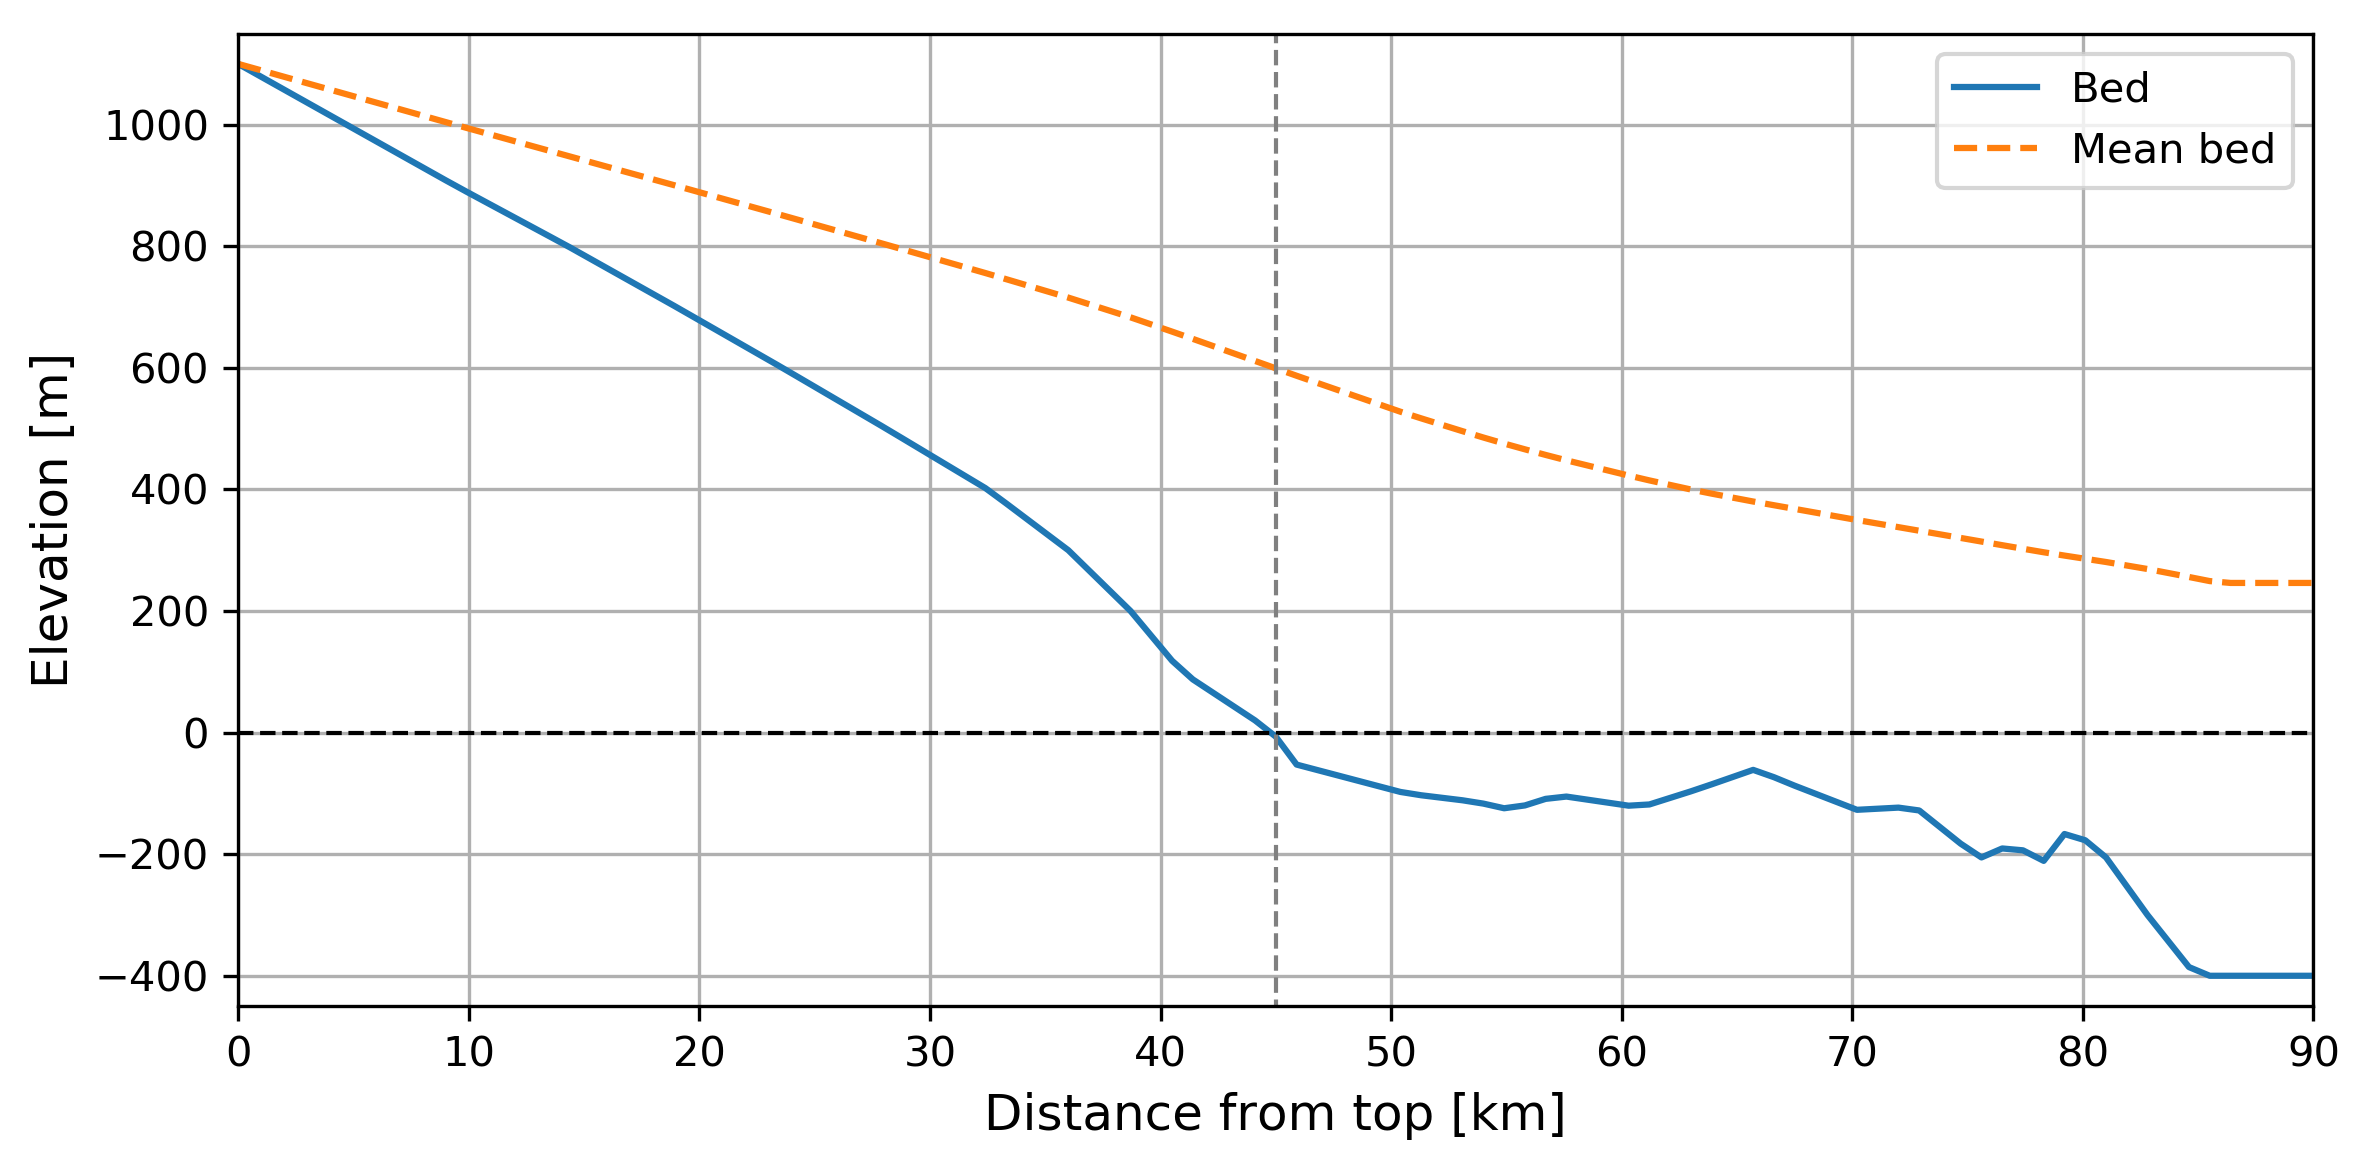

In [2]:
veteranen = CustomBedModel(x1, y1, name="Veteranen", w=veteranen_width)

x = np.linspace(0, 90000, 101)

sl_index = np.argwhere(np.array([veteranen.bed(xi) for xi in x]) <= 0)[0]
sl_x = x[sl_index][0]


plt.figure(figsize=(fig_w, fig_h), dpi=dpi)
plt.plot(x/1e3, [veteranen.bed(xi) for xi in x], "-", label="Bed")
plt.plot(x/1e3, [veteranen.mean_bed(xi) for xi in x], "--", label="Mean bed")
plt.plot(x/1e3, np.zeros(np.size(x)), "--", c="black", linewidth=1) # sealevel
plt.plot([sl_x/1e3, sl_x/1e3], [-500, 1200], "--", c="gray", linewidth=1) # sealevel crossing

# plt.title("Bed")
plt.grid()
plt.legend()
plt.xlim([np.min(x)/1e3, np.max(x)/1e3])
plt.ylim([-450, 1150])
plt.xlabel("Distance from top [km]", fontsize=12)
plt.ylabel("Elevation [m]", fontsize=12)
plt.tight_layout()
plt.savefig("figures/bed.png")
plt.show()

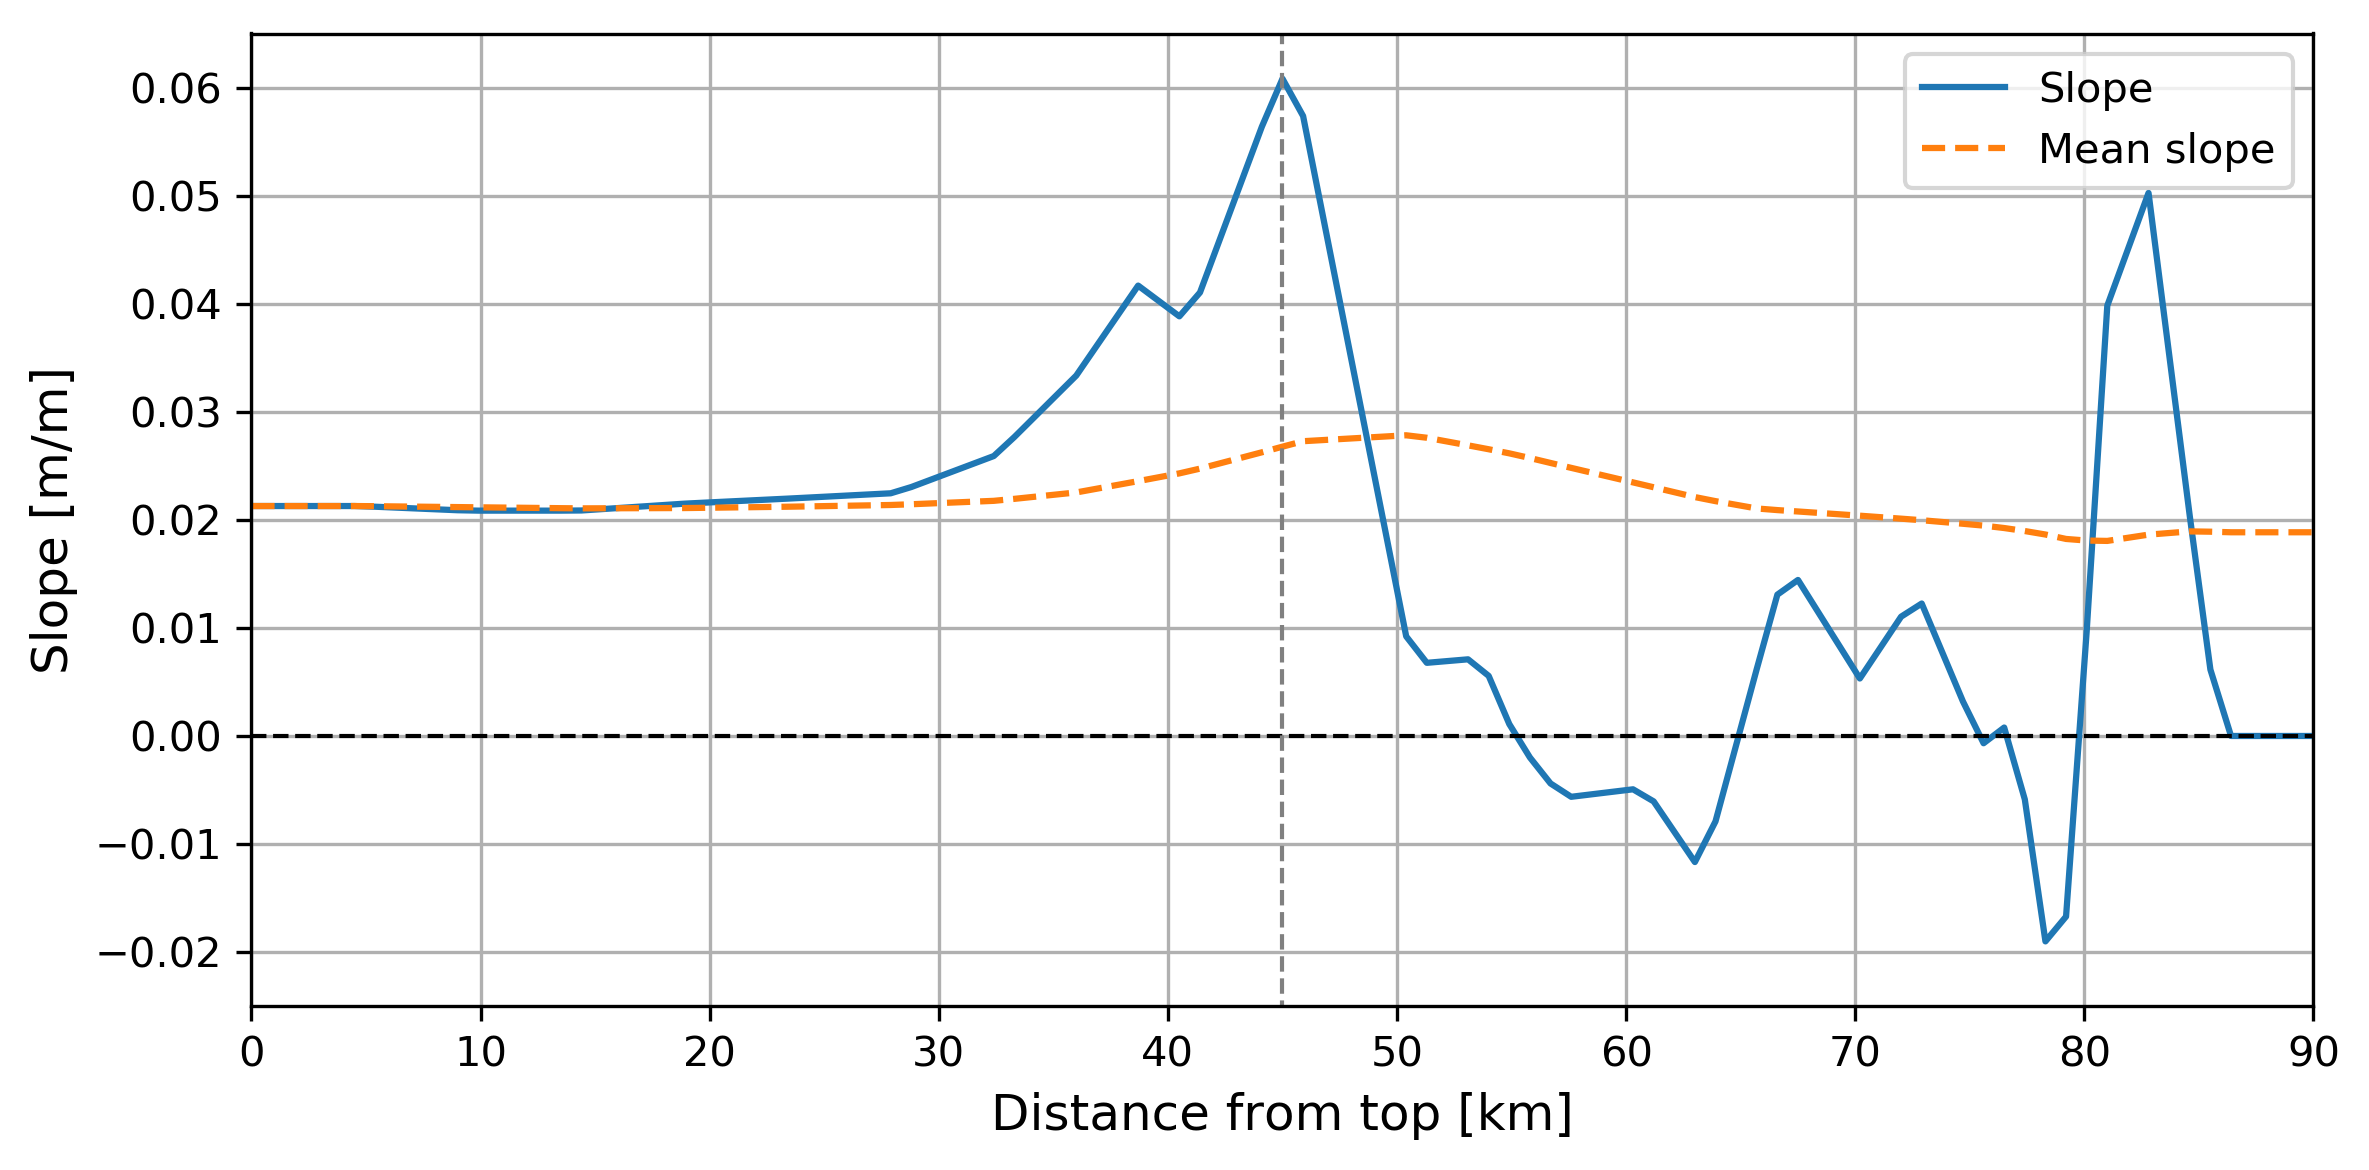

In [3]:
plt.figure(figsize=(fig_w, fig_h), dpi=dpi)
plt.plot(x/1e3, [veteranen.slope(xi) for xi in x], "-", label="Slope")
plt.plot(x/1e3, [veteranen.mean_slope(xi) for xi in x], "--", label="Mean slope")
plt.plot(x/1e3, np.zeros(np.size(x)), "--", c="black", linewidth=1) # sealevel
plt.plot([sl_x/1e3, sl_x/1e3], [-0.03, 0.07], "--", c="gray", linewidth=1) # sealevel crossing

# plt.title("Bed")
plt.grid()
plt.legend()
plt.xlim([np.min(x)/1e3, np.max(x)/1e3])
plt.ylim([-0.025, 0.065])
plt.xlabel("Distance from top [km]", fontsize=12)
plt.ylabel("Slope [m/m]", fontsize=12)
plt.tight_layout()
plt.savefig("figures/slope.png")
plt.show()